In [ ]:
from google.colab import files
upload=files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [ ]:
# Check basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Check the first few rows to get an overview
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#check for the shape (rows, columns)
df.shape

(541909, 8)

In [ ]:
# Descriptive statistics for numerical columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# Fill missing values in Description with 'Unknown'
df['Description'].fillna('Unknown', inplace=True)
# Fill missing CustomerID with -1 (or any placeholder that makes sense)
df['CustomerID'].fillna(-1, inplace=True)

<ipython-input-2-a4d695bec607>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)
<ipython-input-2-a4d695bec607>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

##1. Sales by Country

In [ ]:
# Create a new column for total sales value
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Sales by Country
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
print(sales_by_country)

# Number of transactions by Country
transactions_by_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
print(transactions_by_country)

# Unique customers by Country
customers_by_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
print(customers_by_country)

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

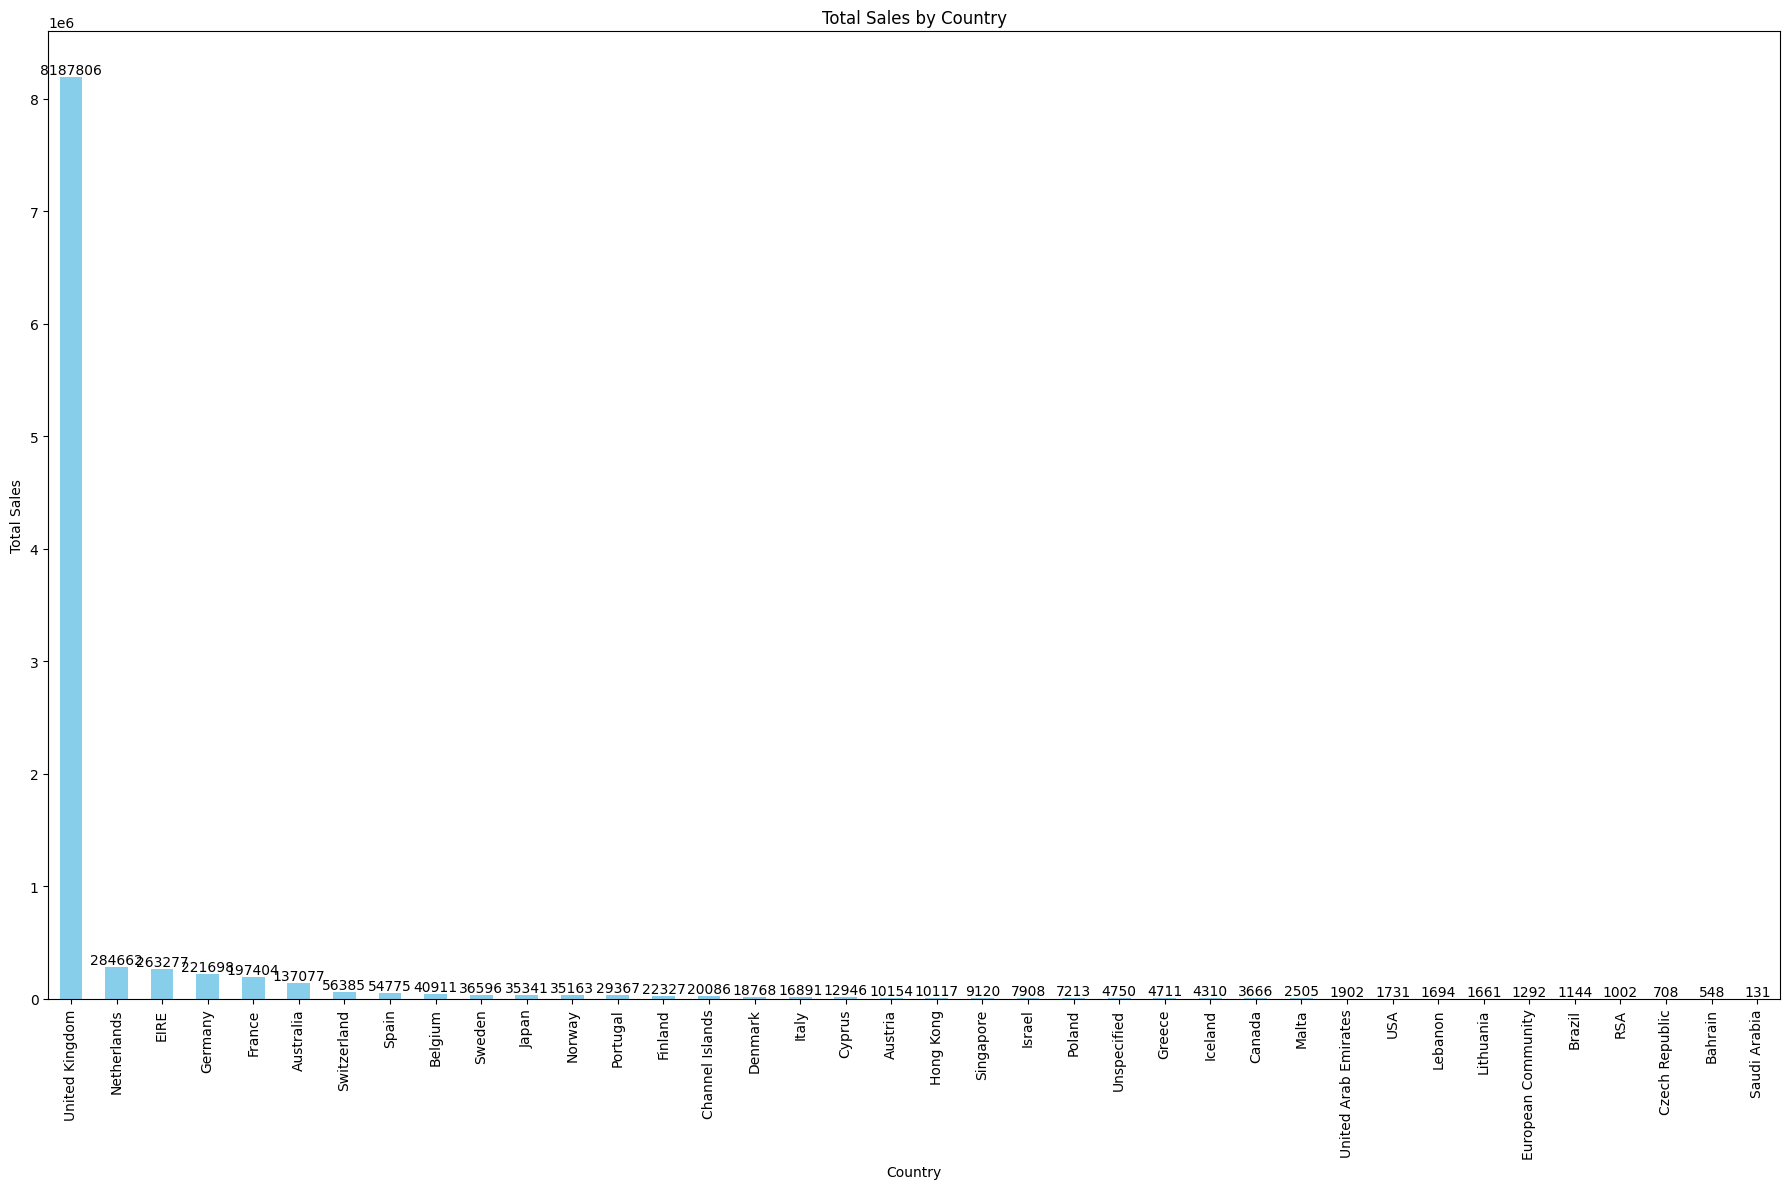

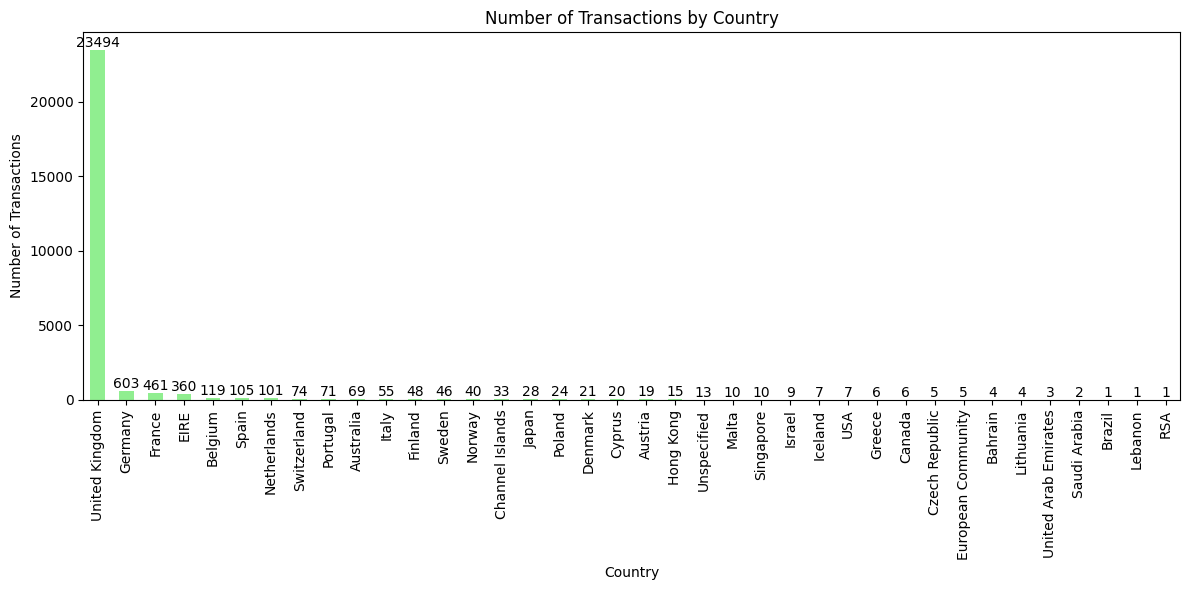

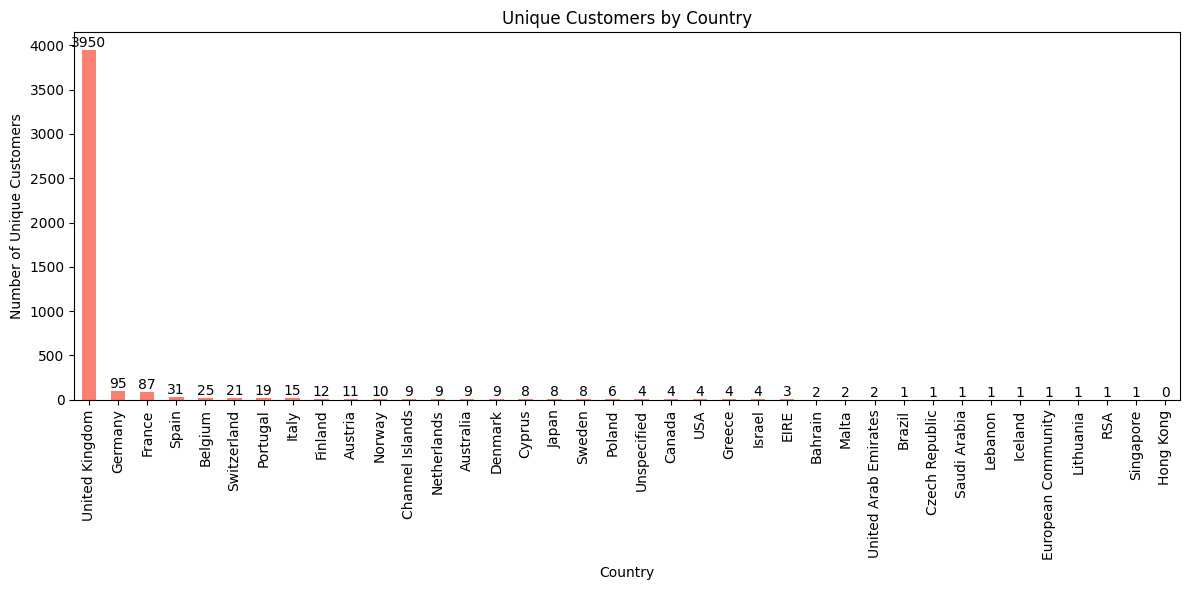

In [ ]:
import matplotlib.pyplot as plt

# Function to add labels on top of bars
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height():.0f}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10)

# Total Sales by Country
plt.figure(figsize=(18, 12))
ax1 = sales_by_country.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Country')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=90)
add_labels(ax1)
plt.tight_layout()
plt.show()

# Number of Transactions by Country
plt.figure(figsize=(12, 6))
ax2 = transactions_by_country.plot(kind='bar', color='lightgreen')
plt.title('Number of Transactions by Country')
plt.ylabel('Number of Transactions')
plt.xlabel('Country')
plt.xticks(rotation=90)
add_labels(ax2)
plt.tight_layout()
plt.show()

# Unique Customers by Country
plt.figure(figsize=(12, 6))
ax3 = customers_by_country.plot(kind='bar', color='salmon')
plt.title('Unique Customers by Country')
plt.ylabel('Number of Unique Customers')
plt.xlabel('Country')
plt.xticks(rotation=90)
add_labels(ax3)
plt.tight_layout()
plt.show()

##2. Product Analysis

In [ ]:
# Top products by total sales
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Most frequently purchased products
frequent_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(frequent_products)

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalSales, dtype: float64
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: 

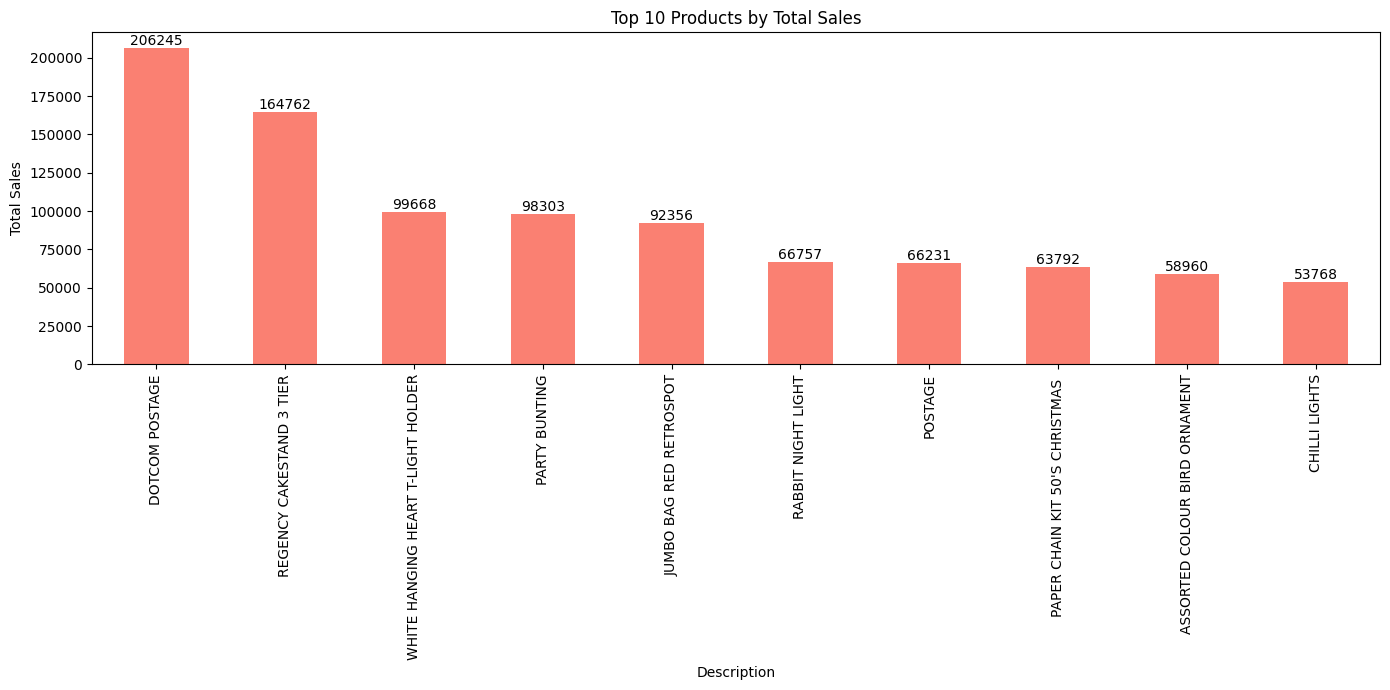

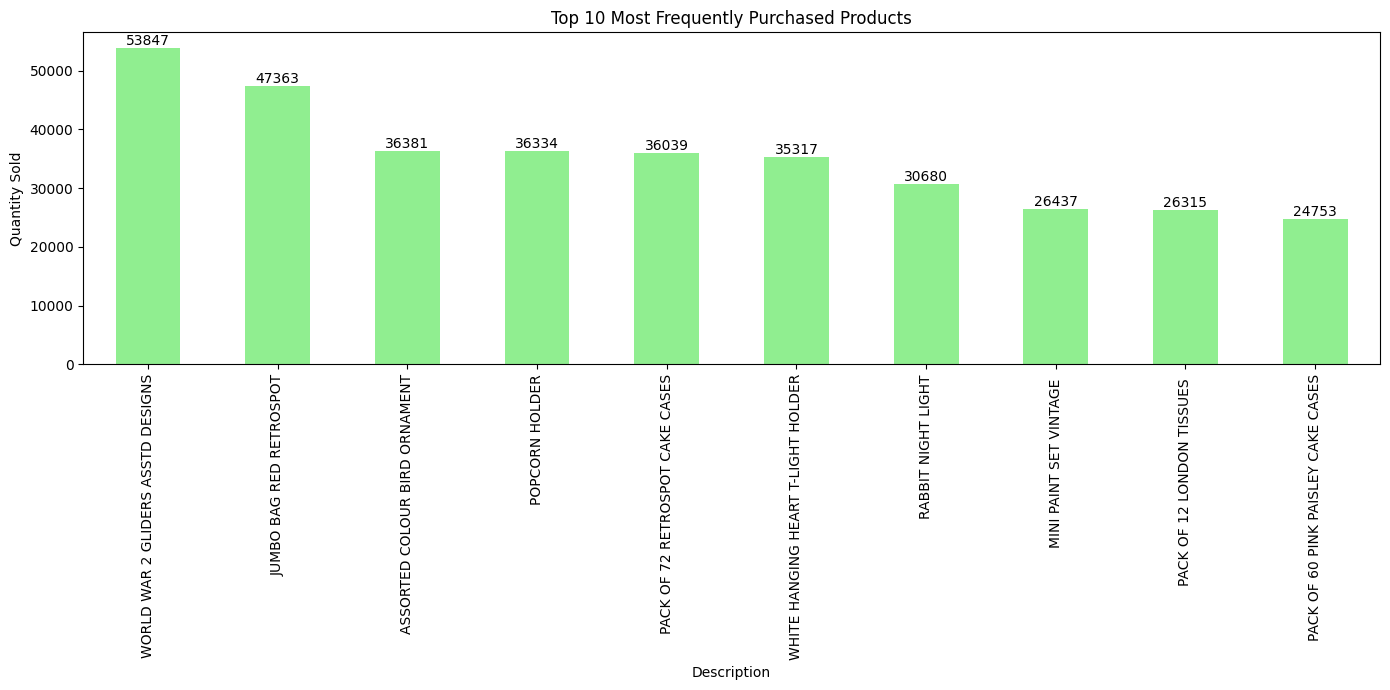

In [ ]:
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height():.0f}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom', fontsize=10)

# Plot top 10 products by total sales
plt.figure(figsize=(14, 7))
ax1 = top_products.plot(kind='bar', color='salmon')
plt.title("Top 10 Products by Total Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
add_labels(ax1)
plt.tight_layout()
plt.show()

# Plot top 10 most frequently purchased products
plt.figure(figsize=(14, 7))
ax2 = frequent_products.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Most Frequently Purchased Products")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=90)
add_labels(ax2)
plt.tight_layout()
plt.show()

##3. Customer Behavior Analysis

In [ ]:
# Purchase frequency and total spend by customer
customer_spend = df.groupby('CustomerID').agg({'TotalSales': 'sum', 'InvoiceNo': 'nunique'}).reset_index()

# Segmentation: High-value customers, frequent buyers, etc.
customer_spend['Segment'] = pd.cut(customer_spend['TotalSales'], bins=[0, 50, 500, 5000], labels=["Low", "Medium", "High"])

print(customer_spend.head())

# Distribution of customer segments
customer_spend['Segment'].value_counts()

   CustomerID  TotalSales  InvoiceNo Segment
0     12346.0        0.00          2     NaN
1     12347.0     4310.00          7    High
2     12348.0     1797.24          4    High
3     12349.0     1757.55          1    High
4     12350.0      334.40          1  Medium


,count
Segment,
High,2276
Medium,1742
Low,41


<ipython-input-17-088f415cc0b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=customer_spend, palette="Blues")


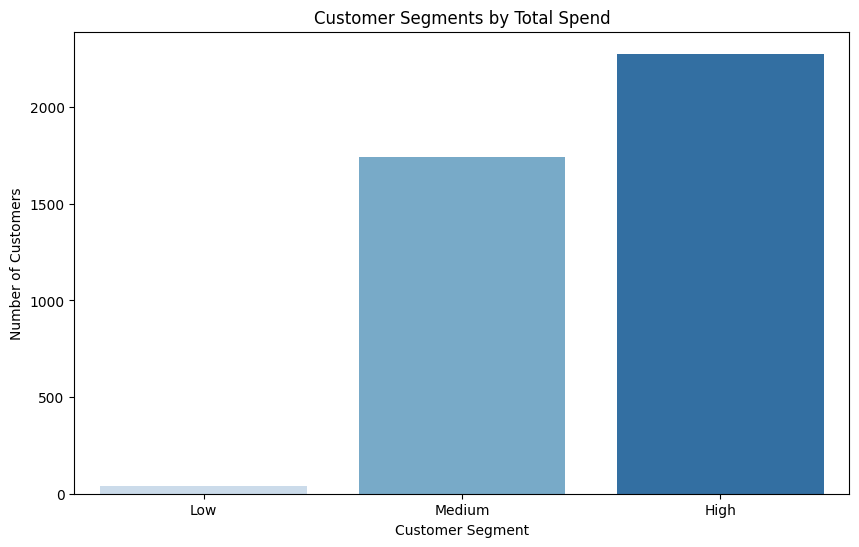

In [ ]:
# Plot spend distribution by customer segments
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=customer_spend, palette="Blues")
plt.title("Customer Segments by Total Spend")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

##4. Time-based Analysis (Seasonality and Trends)

In [ ]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Group by day and sum TotalSales
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum()

# Group by month and sum TotalSales
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()

# Sales by hour
df['Hour'] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby('Hour')['TotalSales'].sum()

print(daily_sales.head())
print(monthly_sales.head())
print(hourly_sales.head())


InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-05    31383.95
2010-12-06    53860.18
Name: TotalSales, dtype: float64
InvoiceDate
2010-12    748957.020
2011-01    560000.260
2011-02    498062.650
2011-03    683267.080
2011-04    493207.121
Freq: M, Name: TotalSales, dtype: float64
Hour
6        -497.350
7       31009.320
8      281840.860
9      766734.051
10    1329056.521
Name: TotalSales, dtype: float64


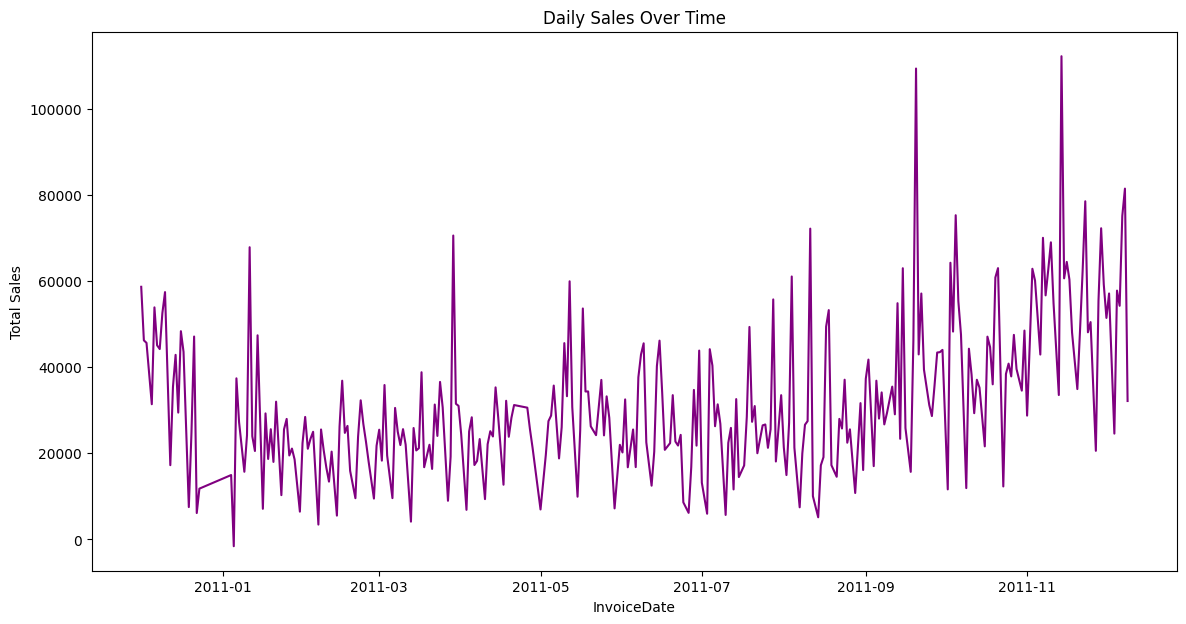

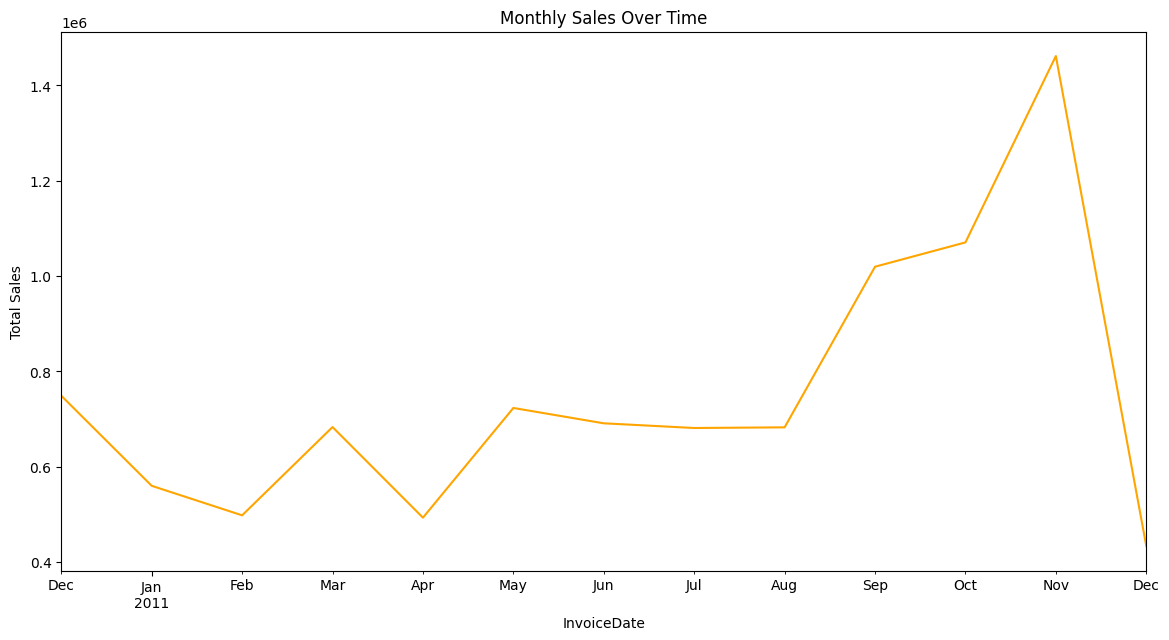

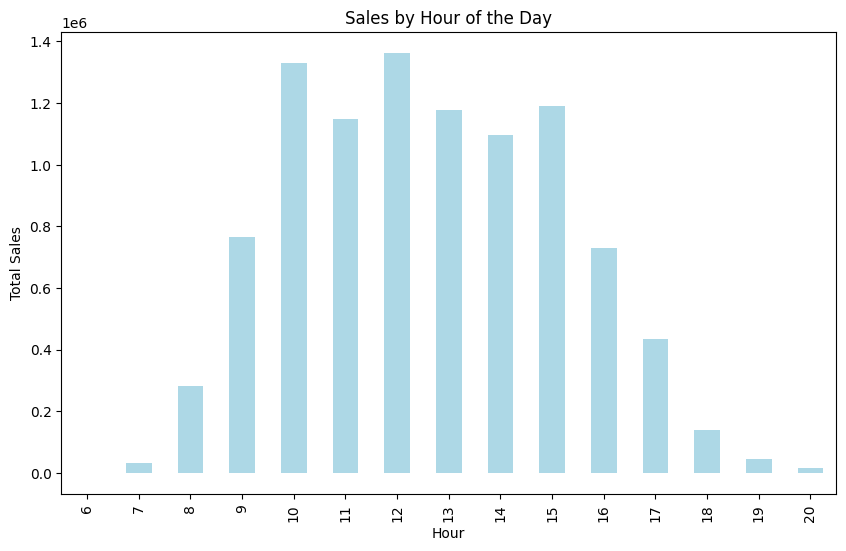

In [ ]:
# Plot sales over time (daily)
plt.figure(figsize=(14, 7))
daily_sales.plot(kind='line', color='purple')
plt.title("Daily Sales Over Time")
plt.ylabel("Total Sales")
plt.show()

# Plot sales over time (monthly)
plt.figure(figsize=(14, 7))
monthly_sales.plot(kind='line', color='orange')
plt.title("Monthly Sales Over Time")
plt.ylabel("Total Sales")
plt.show()

# Plot sales by hour
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar', color='lightblue')
plt.title("Sales by Hour of the Day")
plt.ylabel("Total Sales")
plt.xlabel("Hour")
plt.show()

##5.Advanced Analysis (Clustering, Predictive Models)

In [ ]:
from sklearn.cluster import KMeans

# Perform clustering on customer spend and frequency
X = customer_spend[['TotalSales', 'InvoiceNo']]

# Normalize the data (important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_spend['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
print(customer_spend.groupby('Cluster').agg({'TotalSales': 'mean', 'InvoiceNo': 'mean'}))

            TotalSales   InvoiceNo
Cluster                           
0          1082.928607    3.642392
1        124312.306364  109.909091
2         11409.932290   27.457944


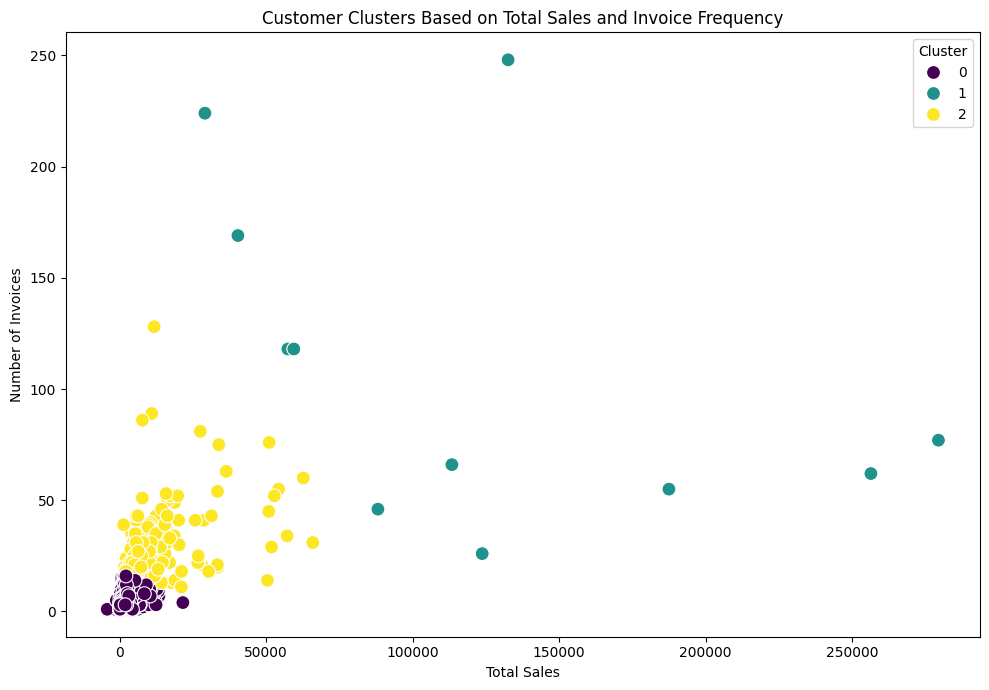

In [ ]:
# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='TotalSales',
    y='InvoiceNo',
    hue='Cluster',
    data=customer_spend,
    palette='viridis',
    s=100
)
plt.title("Customer Clusters Based on Total Sales and Invoice Frequency")
plt.xlabel("Total Sales")
plt.ylabel("Number of Invoices")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()